# Определение возраста покупателей

Смоделируем, что некий сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
* Контролировать добросовестность кассиров при продаже алкоголя.
Требуется построить модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста и удаленный GPU-тренажер.

# Исследовательский анализ данных

* Посмотреть на размер выборки.
* Построить график распределения возраста в выборке.
* Напечатать на экране 10–15 фотографий и посмотрите, как устроен датасет.

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Загрузка датасета


In [2]:
df = pd.read_csv('/datasets/faces/labels.csv')
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


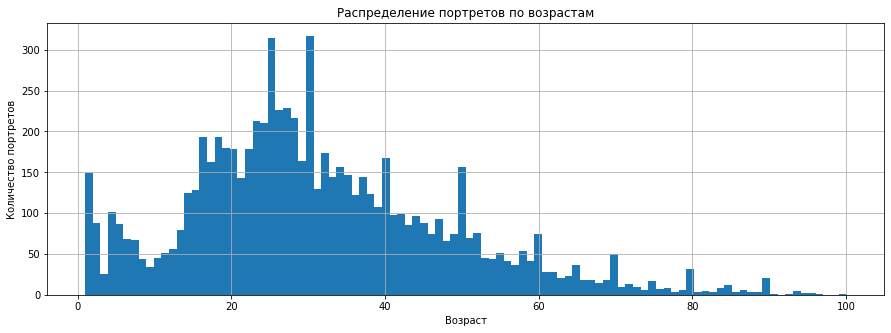

In [5]:
df.real_age.hist(bins=100, figsize=(15, 5))
plt.title('Распределение портретов по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество портретов')
plt.show()

In [4]:
df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


В выборке представлены портреты людей от 1 до 100 лет. 

Возраст распределен неравномерно. Наблюдается относительно мало представителей старше 80 лет. 
Вероятно, модель будет хуже определять представителей этой возрастной группыы. 

Средний и медианный возраст людей на фтографиях - около 30 лет.   
Наибольшее количество представленных портретов принадлежит людям от 20 до 40 лет. 

In [5]:
raw_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
raw_datagen_flow = raw_datagen.flow_from_dataframe(
    directory='/datasets/faces/final_files/',
    dataframe=df,
    target_size=(224, 224),
    batch_size=16,
    class_mode='raw',
    x_col="file_name",
    y_col="real_age")

Found 7591 validated image filenames.


In [7]:
features, target = next(raw_datagen_flow)
features[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

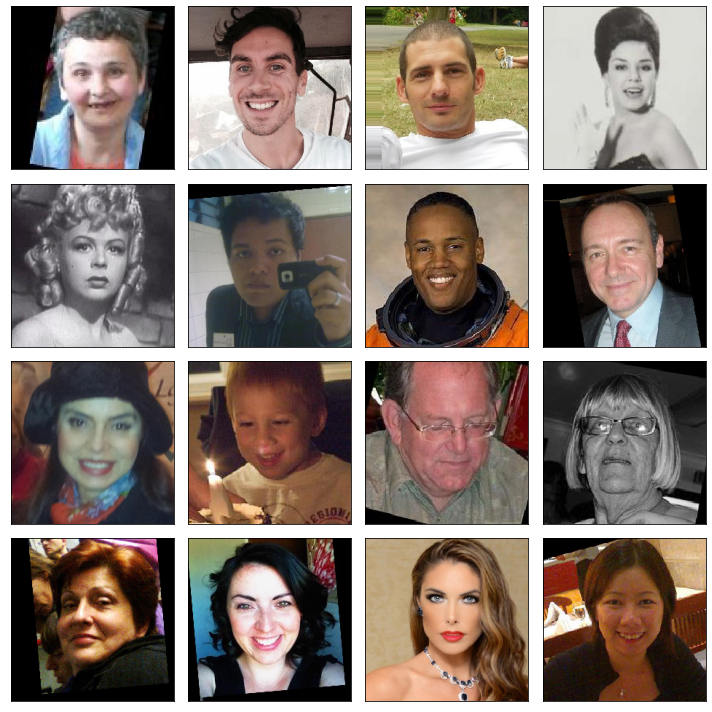

In [8]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [9]:
train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

In [10]:
train_datagen_flow = train_datagen.flow_from_dataframe(
    directory='/datasets/faces/final_files/',
    dataframe=df,
    target_size=(224, 224),
    batch_size=16,
    class_mode='raw',
    subset='training',
    seed=13,
    x_col="file_name",
    y_col="real_age",
    shuffle=True)


Found 5694 validated image filenames.


In [11]:
features, target = next(train_datagen_flow)
features[0]

array([[[0.0509804 , 0.08235294, 0.15686275],
        [0.0509804 , 0.08235294, 0.15686275],
        [0.0509804 , 0.08235294, 0.15686275],
        ...,
        [0.44332466, 0.32941177, 0.24705884],
        [0.45235005, 0.33078143, 0.2484285 ],
        [0.45901093, 0.33607265, 0.2509804 ]],

       [[0.0509804 , 0.08235294, 0.15686275],
        [0.0509804 , 0.08235294, 0.15686275],
        [0.0509804 , 0.08235294, 0.15686275],
        ...,
        [0.44332466, 0.32941177, 0.24705884],
        [0.45235005, 0.33078143, 0.2484285 ],
        [0.45901093, 0.33607265, 0.2509804 ]],

       [[0.0509804 , 0.08235294, 0.15686275],
        [0.0509804 , 0.08235294, 0.15686275],
        [0.0509804 , 0.08235294, 0.15686275],
        ...,
        [0.44332466, 0.32941177, 0.24705884],
        [0.45235005, 0.33078143, 0.2484285 ],
        [0.45901093, 0.33607265, 0.2509804 ]],

       ...,

       [[0.0133289 , 0.01725047, 0.02509361],
        [0.0133289 , 0.01725047, 0.02509361],
        [0.0133289 , 0

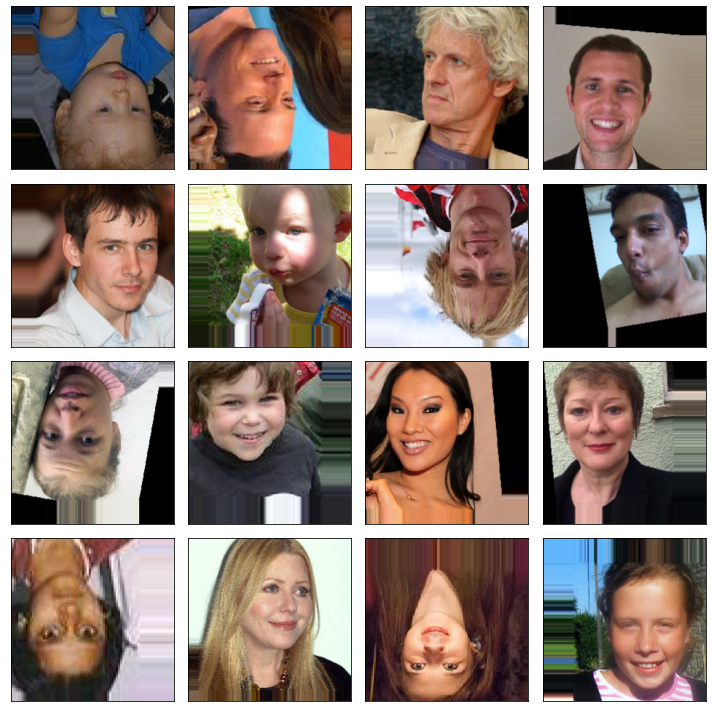

In [12]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Загрузчик изображений определил и сопоставил с датафреймом все 7591 фото.  
В начальном варианте портреты на фото центрированы, имеют вертикальную ориентацию портретов, обрезаны так, чтобы в кадре помещалось лицо человека, на части фотографий закрыты черным лишние детали, которые могут помешать обучению модели.  


После аугментации на некоторых фотографиях части лиц вышли за пределы изображения, смещения. 

# Обучение модели

Загружаемые функции:

```python
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePoolineras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
 
def load_train(path):
    df = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25, rescale=1/255,
        horizontal_flip=True,
        vertical_flip=False,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
    )
    train_dataflow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory=path + 'final_files/',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=13,
        shuffle=True,
        x_col='file_name',
        y_col='real_age',
    )
    return train_dataflow
 
def load_test(path):
    df = pd.read_csv(path + 'labels.csv')
    validation_datagen = ImageDataGenerator(validation_split=.25, rescale=1/255.)
    val_dataflow = validation_datagen.flow_from_dataframe(
        dataframe=df,
        directory=path + 'final_files/',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=13,
        shuffle=True,
        x_col='file_name',
        y_col='real_age',
    )
    return val_dataflow
 
def create_model(input_shape):
    optimizer = Adam(learning_rate=0.0001)
 
    model = Sequential()
    backbone = ResNet50(
        input_shape=input_shape,
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        include_top=False
    )
 
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model
 
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):
    if not steps_per_epoch:
        steps_per_epoch = len(train_data)
    if not validation_steps:
        validation_steps = len(test_data)
 
    model.fit(train_data,
          validation_data=test_data,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          verbose=2, shuffle=True, epochs=epochs,
          batch_size=batch_size,
    )
 
    return modele=True, epochs=epochs,
          batch_size=batch_size,
    )
 
    return model
```

Полученный результат в GPU тренажере:

```
Train for 356 steps, validate for 119 steps  
Epoch 1/1o.7
356/356 - 101s - loss: 225.6607 - mae: 11.2601 - val_loss: 326.9182 - val_mae: 13.4271  
Epoch 2/10
356/356 - 93s - loss: 139.1926 - mae: 9.0271 - val_loss: 228.4421 - val_mae: 11.0551  
Epoch 3/10
356/356 - 93s - loss: 121.9371 - mae: 8.4485 - val_loss: 92.5043 - val_mae: 7.3863  
Epoch 4/10
356/356 - 93s - loss: 108.3516 - mae: 7.9139 - val_loss: 128.6855 - val_mae: 8.7815  
Epoch 5/10
356/356 - 93s - loss: 97.9750 - mae: 7.5259 - val_loss: 92.8150 - val_mae: 7.2368  
Epoch 6/10
356/356 - 95s - loss: 86.5347 - mae: 7.1283 - val_loss: 103.6466 - val_mae: 7.6549  
Epoch 7/10
356/356 - 98s - loss: 91.6644 - mae: 7.2118 - val_loss: 150.5789 - val_mae: 9.2024  
Epoch 8/10
356/356 - 96s - loss: 75.6251 - mae: 6.6966 - val_loss: 119.0277 - val_mae: 7.7958  
Epoch 9/10
356/356 - 97s - loss: 71.1644 - mae: 6.4403 - val_loss: 119.6202 - val_mae: 8.3143  
Epoch 10/10
356/356 - 96s - loss: 64.6579 - mae: 6.1616 - val_loss: 88.5696 - val_mae: 7.0424  
WARNING:tensorflow:sample_weight modes were coerced from
  ...  
    to    
  ['...']  
119/119 - 10s - loss: 88.5696 - mae: 7.0424  
Test MAE: 7.0424  

# Анализ обученной модели


Mean Absolute Error (MAE) 
Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значение.   
В финальной модели она составляет 7 лет. Судя по тому, что детский портретов достаточно много, существенный вклад вносят фото людей старшего возраста, которые в выборке мало представлены. 

На валидационных выборках значение МАЕ больше, что говорит о некоторм переобучении. Его можно было бы снизить, заморозив часть ResNet50.

При использовании ротации в аугментации изображений метрика снизилась до 7